# __Analisis de personalidad de clientes (Parte I)__

Es un analisis detallado que se realiza a los clientes para encontrar el cliente ideal de una empresa. Permite a las empresas comprender mejor a sus clientes para facilitar la adaptacion de sus productos segun las necesidades, comportamientos e inquietudes especificas de los diferentes tipos de clientes.

La forma en que lo vamos a realizar es segmentando los clientes de acuerdo a caracteristicas comunes y encontrar el grupo que tiene mayor probabilidad de comprar un producto para luego comerciarlizarlo unicamente a ese segemento en particular, reduciendo costos de distribucion, marketing y ahorrando tiempo.

## __Contexto de los Datos__

Vamos a trabajar con un set de datos de clientes de una empresa. La descripcion de la informacion recolectada es la siguiente:

Informacion Basica: 

- _ID_: Identificador unico de cliente.
- _Year_Birth_: Año de nacimiento del cliente.
- _Education_: Nivel educativo.
- _Marital_Status_: Estado civil.
- _Income_: Ingresos familiares anuales.
- _Kidhome_: Numero de niños en el hogar.
- _Teenhome_: Numero de adolescentes en el hogar.
- _Dt_Customer_: Fecha de alta del cliente en la empresa.
- _Recency_: Numero de dias desde la ultima compra del cliente.

Informacion de productos:

- _MntWines_: Cantidad gastada en vino en los ultimos 2 años.
- _MntFruits_: Cantidad gastada en frutas en los ultimos 2 años.
- _MntMeatProducts_: Cantidad gastada en carnes en los ultimos 2 años.
- _MntSweetProducts_: Cantidad gastada en dulces en los ultimos 2 años.
- _MntGoldProds_:Cantidad gastada en oro en los ultimos 2 años.

Informacion de promociones tomada por los clientes

- _NumDealsPurchases_: Numero de compras realizadas con descuento.
- _AcceptedCmp1_: 1 si el cliente aceptó la oferta en la primera campaña, 0 en caso contrario.
- _AcceptedCmp2_: 1 si el cliente aceptó la oferta en la segunda campaña, 0 en caso contrario.
- _AcceptedCmp3_: 1 si el cliente aceptó la oferta en la tercera campaña, 0 en caso contrario.
- _AcceptedCmp4_: 1 si el cliente aceptó la oferta en la cuarta campaña, 0 en caso contrario.
- _AcceptedCmp5_: 1 si el cliente aceptó la oferta en la quinta campaña, 0 en caso contrario.
- _Response_: 1 si el cliente aceptó la oferta en la ultima campaña, 0 en caso contrario.

Informacion sobre el sitio de compras

- _NumWebPurchases_: Numero de compras realizadas a traves del sitio web de la empresa.
- _NumCatalogPurchases_: Numero de compras realizadas a traves del catalogo.
- _NumStorePurchases_: Numero de compras realizadas directamente en tiendas.
- _NumWebVisitsMonth_: Numero de visitas al sitio web en el ultimo mes.


Informacion extra:
- _Complain_: Numero de quejas dejada por el cliente.
- _Z_CostContact_: Costo por obtener al cliente.
- _Z_Revenue_: Ganancia por clic.
- _Response_: Respuesta.



## __Importando librerias__

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## __Cargando el dataset__

In [50]:
df = pd.read_csv('./marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## __Comprension y procesamiento de los datos__

### 1. Informacion por variable

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

> El dataset contiene 2240 registros en 29 columnas.

> Las variables Education, Marital_Status y Dt_customer son de tipo 'object'. Debemos convertirlas en un formato adecuado para que pueda ser interpretado correctamente por el modelo que se implementara.

> La variable Income presenta valores faltantes.

> Las variables Z_CostContact, Z_Revenue, Response e ID no nos proporciona informacion relevante en nuestro objetivo, por lo que deben ser eliminadas. 

### 2. Analisis estadistico descriptivo

In [52]:
# para variables numericas
df.describe(include='number').round(2).T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.16,3246.66,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.81,11.98,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.25,25173.08,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.44,0.54,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.51,0.54,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.11,28.96,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.94,336.60,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.30,39.77,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.95,225.72,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.53,54.63,0.0,3.00,12.0,50.00,259.0


> En variables como Income podrian presentarse valores atipicos. 

In [53]:
# para variables categoricas
df.describe(include='object').round(2).T

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,31-08-2012,12


> La mayoria de los clientes son graduados y estan casados

### 3. Chequeo de valores nulos y duplicados

In [54]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

> Como vimos, la variable Income presenta 24 valores faltantes.

In [55]:
# chequeo de registros duplicados
df.duplicated().sum()

0

> No hay clientes duplicados

### 4. Eliminacion de valores faltantes

Debido a que son muy pocos los registros con valores faltantes, los eliminamos para facilitar los calculos

In [56]:
df.dropna(inplace=True)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### 5. Eliminar columnas innecesarias 

Vamos a analizar cuantas categorias contienen las variables 'Z_CostContact', 'Z_Revenue' y 'Response'.

In [57]:
print(f"Cantidad de valores unicos de Z_CostContact: {df['Z_CostContact'].nunique()}")
print(f"Cantidad de valores unicos de Z_Revenue: {df['Z_Revenue'].nunique()}")
print(f"Cantidad de valores unicos de Response: {df['Response'].nunique()}")

Cantidad de valores unicos de Z_CostContact: 1
Cantidad de valores unicos de Z_Revenue: 1
Cantidad de valores unicos de Response: 2


> Las variables 'Z_Cost?Contact' y 'Z_Revenue' no aportan valor al analisis debido a que tienen el mismo valor para todos los registros, por tanto, las eliminamos del dataframe

> La variable 'ID' es un identificador que tampoco aporta valor por lo que tambien lo eliminamos.

In [58]:
df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], inplace=True)
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

### 6. Calcular la edad de los clientes a partir del año de nacimiento y la edad de cliente en la empresa

In [59]:
# Convertimos la columna Dt_customer a tipo fecha
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, format='%d-%m-%Y')

Obtenemos la fecha mas reciente de registro. Se asume que esa es la ultima fecha del sistema o el dia de corte para calcular la antiguedad de cada cliente.

In [60]:
last_date = df['Dt_Customer'].max()

Calculamos los dias como cliente

In [61]:
df['Days_is_client'] = (last_date - df['Dt_Customer']).dt.days

Calculamos la edad del cliente

In [62]:
df['Client_age'] = (last_date.year - df['Year_Birth'])
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_is_client,Client_age
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,1,663,57
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,0,113,60
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,0,312,49
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,0,139,30
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,0,161,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,5,0,0,0,0,0,0,0,381,47
2236,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,7,0,0,0,1,0,0,0,19,68
2237,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,6,0,1,0,0,0,0,0,155,33
2238,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,3,0,0,0,0,0,0,0,156,58


Eliminamos las columnas que ya no necesitamos

In [63]:
df.drop(columns = ['Year_Birth', 'Dt_Customer'], inplace=True)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_is_client,Client_age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,1,663,57
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,0,113,60
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,0,312,49
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,0,139,30
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,0,161,33


### 7. Redefinir las variables categoricas

Analicemos las categorias de cada variable categorica

In [64]:
for col in (df.select_dtypes('object').columns.tolist()):
    valores_unicos = df[col].value_counts()
    print(valores_unicos)
    print('\n')

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64




Vamos a reestructurar los niveles educativos en tres: No graduados, graguados y con posgrado. Lo mismo haremos para el estado civil: En pareja y soltero.

In [65]:
df['Education'].replace({
    'PhD':'Postgraduate',
    'Master':'Postgraduate',
    'Graduation':'Graduate',
    '2n Cycle':'Graduate',
    'Basic':'Undergraduate'
}, inplace=True)

df['Marital_Status'].replace({
    'Married':'Partner',
    'Together':'Partner',
    'Single':'Single',
    'Divorced':'Single',
    'Widow':'Single',
    'Alone':'Single',
    'Absurd':'Single',
    'YOLO':'Single'
}, inplace=True)

Verificamos que la conversion se haya hecho correctamente.

In [66]:
for col in (df.select_dtypes('object').columns.tolist()):
    valores_unicos = df[col].unique()
    print(valores_unicos)

['Graduate' 'Postgraduate' 'Undergraduate']
['Single' 'Partner']


### 8. Crear nueva variable que represente el monto total gastado

Vamos a crear una variable con el total de los montos gastados de los diferentes productos para cada cliente.

In [67]:
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_is_client,Client_age,Expenses
0,Graduate,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,663,57,1617
1,Graduate,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,0,113,60,27
2,Graduate,Partner,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,312,49,776
3,Graduate,Partner,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,139,30,53
4,Postgraduate,Partner,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,0,161,33,422


### 9. Combinar columnas sobre numero de niños, campañas aceptadas y numero de compras

In [68]:
df['Kids'] = df['Kidhome'] + df['Teenhome']

df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

# Creamo una copia del dataframe
data = df.copy()

In [69]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_is_client,Client_age,Expenses,Kids,TotalAcceptedCmp,TotalNumPurchases
0,Graduate,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,1,663,57,1617,0,0,25
1,Graduate,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,113,60,27,2,0,6
2,Graduate,Partner,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,312,49,776,0,0,21
3,Graduate,Partner,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,139,30,53,1,0,8
4,Postgraduate,Partner,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,161,33,422,1,0,19


### 10. Seleccion de variables

Guardamos en una lista las variables que consideramos mas relevantes 

In [70]:
# lista de variables relevantes
columnas_necesarias = ['Education', 'Marital_Status', 'Income', 'Kids', 'Days_is_client', 'Recency', 'Expenses', 'Client_age', 'TotalNumPurchases', 'TotalAcceptedCmp', 'Complain', 'Response']

# nuevo dataframe con las variables relevantes
df = df[columnas_necesarias]
df.head()

,Education,Marital_Status,Income,Kids,Days_is_client,Recency,Expenses,Client_age,TotalNumPurchases,TotalAcceptedCmp,Complain,Response
0,Graduate,Single,58138.0,0,663,58,1617,57,25,0,0,1
1,Graduate,Single,46344.0,2,113,38,27,60,6,0,0,0
2,Graduate,Partner,71613.0,0,312,26,776,49,21,0,0,0
3,Graduate,Partner,26646.0,1,139,26,53,30,8,0,0,0
4,Postgraduate,Partner,58293.0,1,161,94,422,33,19,0,0,0


### 11. Analisis de datos faltantes en el nuevo df

In [71]:
print(f'Registros duplicados: {df.duplicated().sum()}')
print(f'Valores nulos: {df.isnull().sum()}')
print(f'Dimension de los datos: {df.shape}')

Registros duplicados: 185
Valores nulos: Education            0
Marital_Status       0
Income               0
Kids                 0
Days_is_client       0
Recency              0
Expenses             0
Client_age           0
TotalNumPurchases    0
TotalAcceptedCmp     0
Complain             0
Response             0
dtype: int64
Dimension de los datos: (2216, 12)


> Hay 185 registros duplicados que debemos manejar para optimizar los resultados.

> Las variables relevantes estan libres de valores faltantes.

> En total, hay 2216 registros en 12 columnas.

### 12. Categorizar variables en tres grupos basado en sus tipos de datos

In [72]:
# variables con dos valores unicos
binary_columns = [col for col in df.columns if df[col].nunique() == 2]

# variables con mas de 2 y menos de 10 categorias
categorical_columns = [col for col in df.columns if 2 < df[col].nunique() < 10]

# variables numericas continuas
numerical_columns = [col for col in df.select_dtypes(include=['number']).columns if col not in binary_columns + categorical_columns]


### 13. Detectando outliers

Vamos a usar como criterio el Z-Score, que es una medida estadistica que indica cuantas desviaciones estandar se aleja un valor respecto a la media de su variable. 

In [73]:
from scipy.stats import boxcox, zscore

# calcular Z-Score para cada valor numerico
z_score = pd.DataFrame(zscore(df[numerical_columns]), columns=numerical_columns)
z_score

,Income,Days_is_client,Recency,Expenses,Client_age,TotalNumPurchases
0,0.234063,1.529129,0.310532,1.675488,0.986443,1.319446
1,-0.234559,-1.188411,-0.380509,-0.962358,1.236801,-1.157987
2,0.769478,-0.205155,-0.795134,0.280250,0.318822,0.797881
3,-1.017239,-1.059945,-0.795134,-0.919224,-1.266777,-0.897205
4,0.240221,-0.951244,1.554407,-0.307044,-1.016420,0.537099
...,...,...,...,...,...,...
2235,0.356642,0.135772,-0.104093,1.217598,0.151917,0.406708
2236,0.467539,-1.652863,0.241428,-0.270546,1.904422,0.928273
2237,0.188091,-0.980889,1.450751,1.051696,-1.016420,0.537099
2238,0.675388,-0.975948,-1.417072,0.391404,1.069896,1.058664


In [74]:
# identificar los registros donde cualquiera de las z-score supere el umbral
outliers = z_score[(np.abs(z_score) > 3).any(axis=1)]
outliers

,Income,Days_is_client,Recency,Expenses,Client_age,TotalNumPurchases
21,-1.978761,0.916447,-0.242301,1.862958,-0.849514,3.666489
164,4.171896,-1.153824,1.692615,1.660557,-0.348799,2.884141
192,-0.620138,-0.383031,1.727167,-0.899315,5.743241,-1.157987
239,0.315279,-1.534279,-0.898791,-0.970653,6.327410,-1.418770
339,1.243067,-0.383031,-0.449614,2.067018,5.826694,0.015534
432,0.598463,0.832450,0.932470,0.787911,0.151917,3.144924
617,4.376684,0.185182,-0.622374,-0.829636,-0.599157,-1.809943
655,4.040019,-1.045122,1.105230,-0.997198,-0.515704,-1.940335
687,4.313348,1.682299,-0.967895,1.841390,-1.099872,3.796880
987,0.934215,-0.526319,-0.104093,3.117179,-0.014988,1.449838


In [75]:
# eliminar los registros con outliers del dataframe
df = df.drop(outliers.index)
df.shape

(2198, 12)

> Pasamos de 2216 a 2198 registros libres de outliers. Fueron eliminados 18 registros con valores faltantes.

## __EDA__

In [76]:
# Mostramos las variables no numericas
binary_columns + categorical_columns

['Marital_Status',
 'Complain',
 'Response',
 'Education',
 'Kids',
 'TotalAcceptedCmp']

Vamos a generar un conjunto de graficos de histograma con curvas de densidad para cada columna numerica del dataframe.

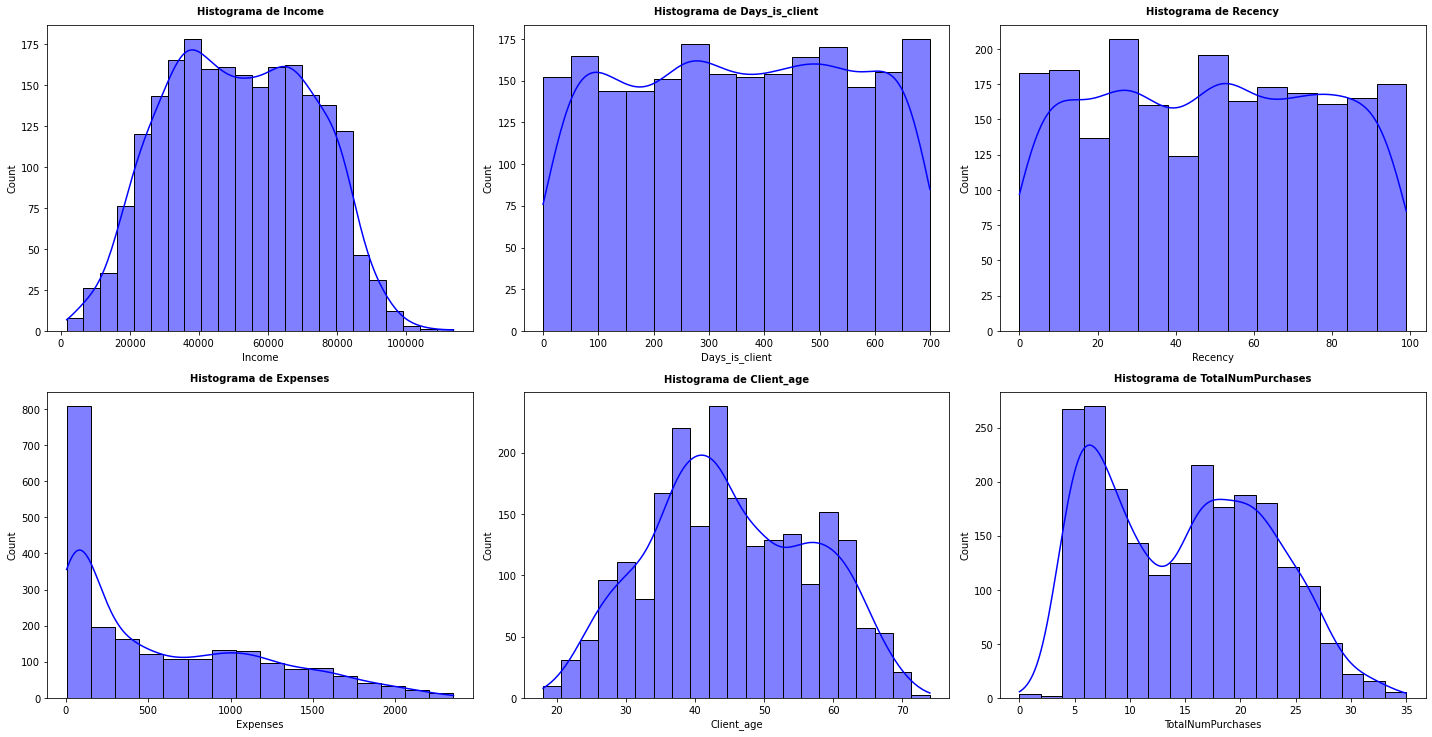

In [78]:
import seaborn as sns

# inicializar variable para posicionar cada histograma
x = 1

# crear figura
plt.figure(figsize=(20,15))
# grilla de graficos
for col in numerical_columns:
    plt.subplot(len(numerical_columns)//2, len(numerical_columns)//2, x)
    sns.histplot(data=df, x=col, kde=True, color='blue')
    plt.title(f'Histograma de {col}', pad=10, fontweight='bold', fontsize=10)
    plt.tight_layout()
    x += 1
plt.show()

Ahora, generamos un set de graficos de barras para visualizar la distribucion de columnas categoricas y binarias del dataframe. 

In [ ]:
# paleta de colores
paleta_pers = ['#327D7C', '#E2504A', '']